<a href="https://colab.research.google.com/github/Takaros96/Analyze-Box-Office-Data-with-Plotly-and-Python/blob/main/coursera_guided_projects_Analyze_Box_Office_Data_with_Plotly_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    import datetime
    import lightgbm as lgb
    from scipy import stats
    from scipy.sparse import hstack, csr_matrix
    from sklearn.model_selection import train_test_split, KFold
    from wordcloud import WordCloud
    from collections import Counter
    from nltk.corpus import stopwords
    from nltk.util import ngrams
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.preprocessing import StandardScaler
    import nltk
    import plotly.offline as py
    import plotly.graph_objs as go
    import plotly.tools as tls
    import xgboost as xgb
    import lightgbm as lgb
    from sklearn import model_selection
    from sklearn.metrics import accuracy_score
    import json
    import ast
    from urllib.request import urlopen
    from PIL import Image
    from sklearn.preprocessing import LabelEncoder
    import time
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model

In [ ]:
test=pd.read_csv("test (1).csv")

In [ ]:
train=pd.read_csv("train (1).csv")

<ipython-input-82-ee0b348d296b>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



AttributeError: ignored

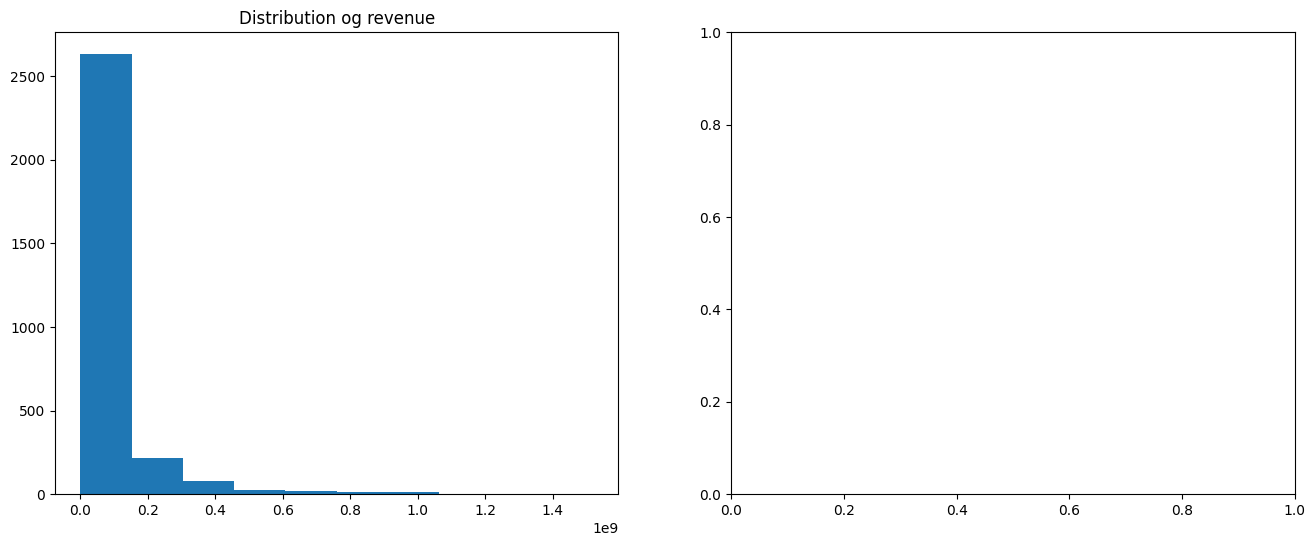

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(train["revenue"])
plt.title("Distribution og revenue")
plt.subplot(1,2,2)
plt.hist(np.loglp(train["revenue"]));
plt.title("Distribution of log of revenue");

In [ ]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: homepage, dtype: int64

In [ ]:
test.loc[test['release_date'].isnull()==False,'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

In [ ]:
def fix_date(x):
  year=x.split('/')[2]
  if int(year)<=19:
    return x[:-2]+"20"+year
  else:
    return x[:-2]+"19"+year

In [ ]:
test.loc[test['release_date'].isnull()==True].head()

In [ ]:
test.loc[test['release_date'].isnull()==True,'release_date']='05/01/00'

In [ ]:
train['release_date']=train['release_date'].apply(lambda x:fix_date(x))

In [ ]:
test['release_date']=test['release_date'].apply(lambda x:fix_date(x))

In [ ]:
train['release_date']=pd.to_datetime(train['release_date'])
test['release_date']=pd.to_datetime(test['release_date'])

In [ ]:
def process_date(df):
  date_parts=['year','weekday','month','weekofyear','quarter']
  for part in date_parts:
    part_col='release_date'+'_'+part
    df[part_col]=getattr(df['release_date'].dt, part)
  return df

In [ ]:
train=process_date(train)
test=process_date(test)

<ipython-input-88-25a4787df2fc>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-88-25a4787df2fc>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [ ]:
d1=train['release_date'].value_counts().sort_index()
d2=test['release_date'].value_counts().sort_index()#will sort in ascending order

In [ ]:
import plotly.offline as py

In [ ]:
import plotly.graph_objects as go

In [ ]:
data=[go.Scatter(x=d1.index,y=d1.values,name='train')#it will create a lineplot.in  x year.in y count of movies
     ,go.Scatter(x=d2.index,y=d2.values,name='test')]

layout=go.Layout(dict(title='Number of films per year'),
                 xaxis=dict(title='Year'),
                 yaxis=dict(title='Count'),
                 legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

In [ ]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].sum()

data=[go.Scatter(x=d1.index,y=d1.values,name='film count')#it will create a lineplot.in  x year.in y count of movies
     ,go.Scatter(x=d2.index,y=d2.values,name='total revenue',yaxis='y2')]

layout=go.Layout(dict(title='Number of films and total revenue per year'),
                 xaxis=dict(title='Year'),
                 yaxis=dict(title='Count'),
                 yaxis2=dict(title='Total revenue',overlaying='y',side='right'),
                 legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

In [ ]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].mean()#average revenue per year

data=[go.Scatter(x=d1.index,y=d1.values,name='film count')#it will create a lineplot.in  x year.in y count of movies
     ,go.Scatter(x=d2.index,y=d2.values,name='mean revenue',yaxis='y2')]

layout=go.Layout(dict(title='Number of films and mean revenue per year'),
                 xaxis=dict(title='Year'),
                 yaxis=dict(title='Count'),
                 yaxis2=dict(title='Average revenue',overlaying='y',side='right'),
                 legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

Text(0.5, 1.0, 'Revenue on different days of the week')

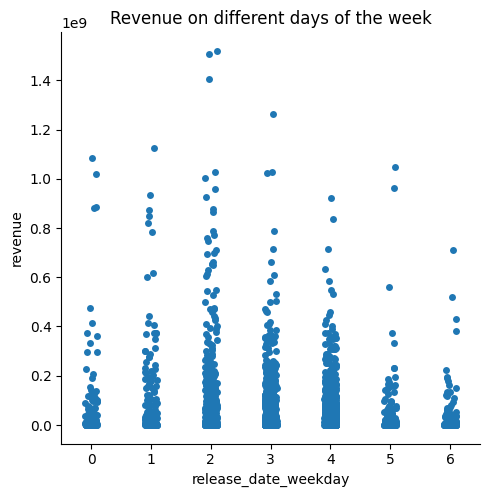

In [ ]:
sns.catplot(x='release_date_weekday',y='revenue',data=train)#see if release day affects revenue
plt.title("Revenue on different days of the week")

<ipython-input-101-d03d4e596e74>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of the length of film in hours')

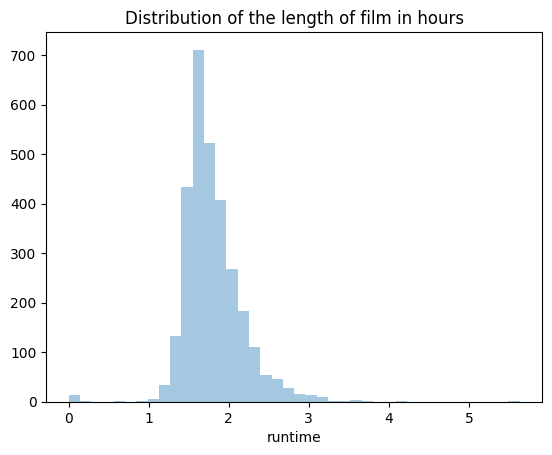

In [ ]:
sns.distplot(train['runtime'].fillna(0)/60,bins=40,kde=False)
plt.title("Distribution of the length of film in hours")

Text(0.5, 1.0, 'runtime vs revenue')

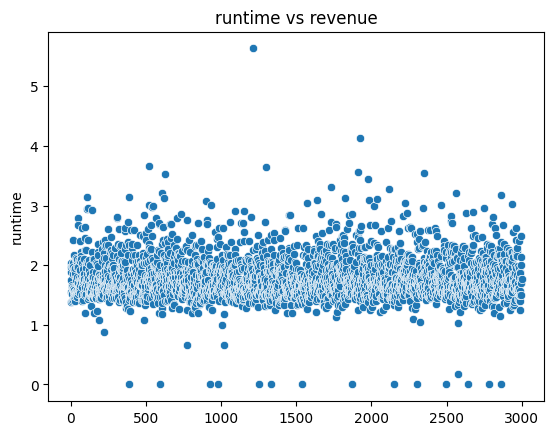

In [ ]:
sns.scatterplot(train['runtime'].fillna(0)/60)
plt.title("runtime vs revenue")
